# Quasi-magnetostatic (Biot-Savart) Solver Validation
## Line Source

In [1]:
from quasistatic import Coil, Grid, Result
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import mu_0, pi
import basic_coils as coils

In [6]:
line_pts = coils.line(1,11)
line = Coil(line_pts)
plane = Grid.evenly_spaced_3D([-.25,.25],.01,[-.25,.25],.01,0,0)
results = line.compute(plane)

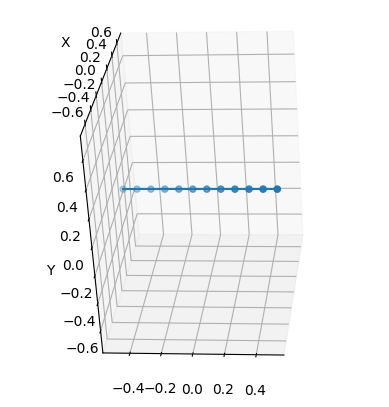

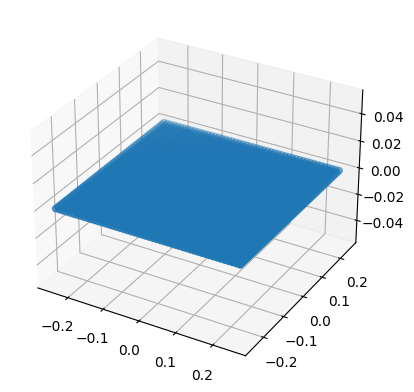

In [3]:
line.plot_coil()
plane.plot()

C:\Users\seo\AppData\Local\Temp\1\ipykernel_8064\2437639178.py:3: RuntimeWarning: divide by zero encountered in divide
  theoretical = mu_0/(2*pi*r*np.sqrt(4*r**2+1))
C:\Users\seo\AppData\Local\Temp\1\ipykernel_8064\2437639178.py:7: RuntimeWarning: divide by zero encountered in log10
  ax[0].imshow(np.log10(results.B1_mag))


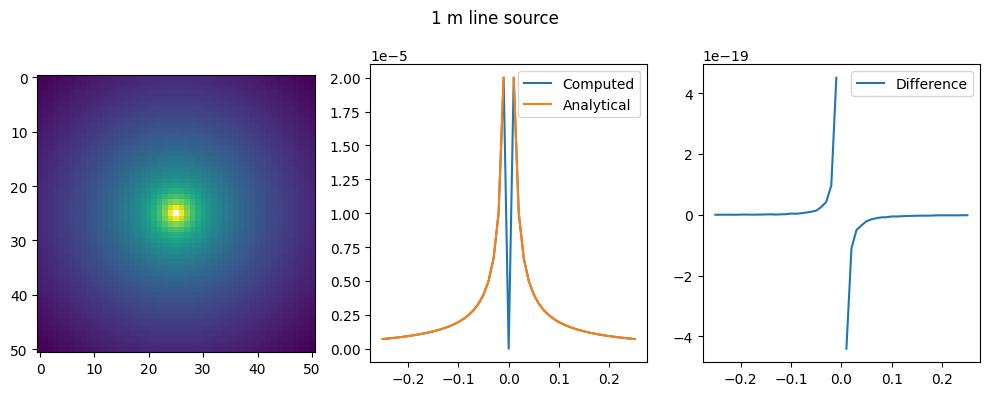

In [4]:
x_axis = np.linspace(-.250,.250,51)
r = np.abs(x_axis)
theoretical = mu_0/(2*pi*r*np.sqrt(4*r**2+1))
results.values[25,25,0]=0
fig, ax = plt.subplots(1,3)
fig.suptitle('1 m line source')
ax[0].imshow(np.log10(results.B1_mag))
ax[1].plot(x_axis, results.B1_mag[:,25].squeeze(), label = 'Computed')
ax[1].plot(x_axis, theoretical, label = 'Analytical')
ax[1].legend()
ax[2].plot(x_axis, results.B1_mag[:,25].squeeze()-theoretical, label = 'Difference')
ax[2].legend()
fig.set_size_inches(10,4)
fig.tight_layout()

## Loop Source

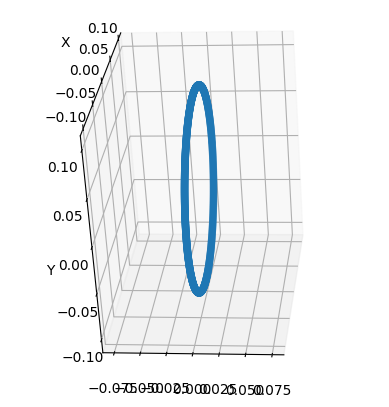

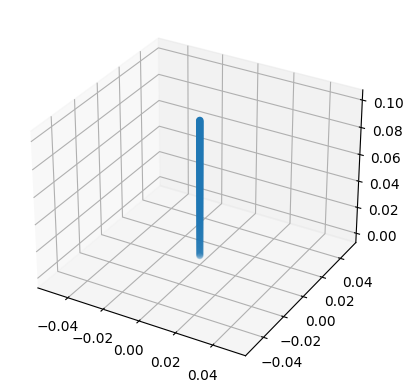

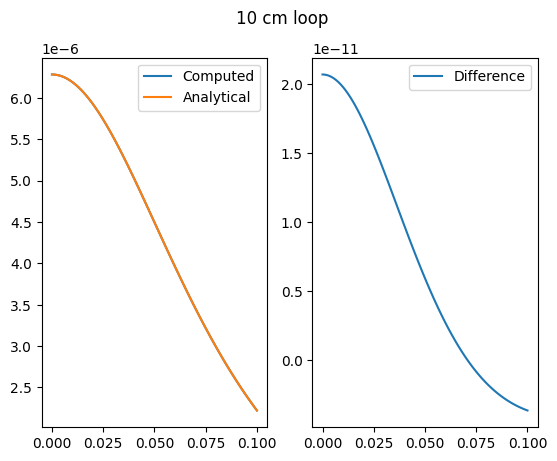

In [5]:
loop_line = Grid.evenly_spaced_3D(0,0,0,0,[0,0.1],.001)

a = 0.1
loop = Coil(coils.circ_loop(a,1000))
loop.plot_coil()
loop_line.plot()
loop_quasi = loop.compute(loop_line)
zs = np.linspace(0,0.1,101)
analytical = mu_0*a**2/(2*(a**2+zs**2)**1.5)

fig, ax = plt.subplots(1,2)
fig.suptitle('10 cm loop')
ax[0].plot(zs, loop_quasi.values[...,2].squeeze(), label='Computed')
ax[0].plot(zs, analytical, label='Analytical')
ax[0].legend()
ax[1].plot(zs, loop_quasi.values[...,2].squeeze()-analytical, label='Difference')
ax[1].legend()
